In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
from numpy import reshape
import matplotlib.pyplot as plt

import nengo
import nengo_dl

(xtrain, _), (xtest, _) = load_data()

xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255
print(xtrain.shape, xtest.shape)

x_train = reshape(xtrain, (len(xtrain), 28, 28, 1))
x_test = reshape(xtest, (len(xtest), 28, 28, 1))
print(x_train.shape, x_test.shape)

input_img = Input(shape=(28, 28, 1))
conv1 = Conv2D(12, (3, 3), activation=tf.nn.relu, padding='same')(input_img)
max1_conv = Conv2D(12, (3, 3), strides=2, activation=tf.nn.relu, padding='same')(conv1)
conv2 = Conv2D(8, (3, 3), activation=tf.nn.relu, padding='same')(max1_conv)
encoded = Conv2D(8, (3, 3), strides=2, activation=tf.nn.relu, padding='same')(conv2)

conv3 = Conv2D(8, (3, 3), activation=tf.nn.relu, padding='same')(encoded)
up1 = UpSampling2D((2, 2))(conv3)
conv4 = Conv2D(12, (3, 3), activation=tf.nn.relu, padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv4)
decoded = Conv2D(1, (3, 3), activation=tf.nn.sigmoid, padding='same')(up2)
autoencoder = Model(input_img, decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.summary()

2021-09-24 13:03:27.349875: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


2021-09-24 13:03:30.882230: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 13:03:30.882905: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-24 13:03:30.917995: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.92GiB deviceMemoryBandwidth: 313.37GiB/s
2021-09-24 13:03:30.918043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-24 13:03:30.921183: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-24 13:03:30.921251: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 12)        120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        1308      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         872       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0   

In [2]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True)

2021-09-24 13:03:31.860762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-24 13:03:31.861159: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3570475000 Hz


Epoch 1/20


2021-09-24 13:03:32.519302: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-09-24 13:03:33.378224: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-24 13:03:33.575658: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


469/469 [==============================] - 6s 8ms/step - loss: 0.2265
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0947
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0857
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0813
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0786
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0770
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0758
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0748
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0740
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0735
Epoch 11/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0727
Epoch 12/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0724
Epoch 13/20
469/469 [===============

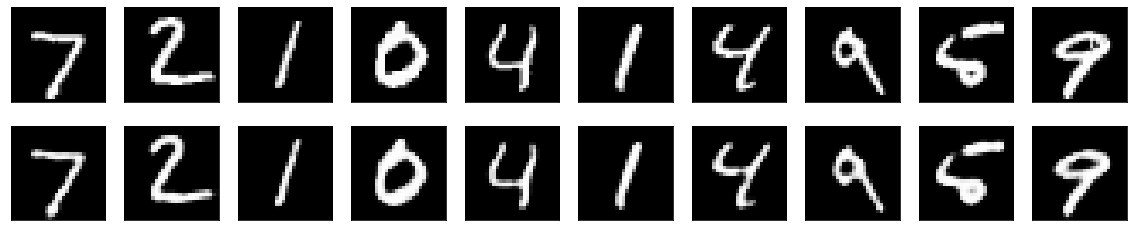

In [3]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.gray()
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i +1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
print('x train shape: ', x_train.shape)
train_images = x_train.reshape(x_train.shape[0], 1, 28*28)
test_images = x_test.reshape(x_test.shape[0], 1, 28*28)

converter = nengo_dl.Converter(autoencoder, scale_firing_rates=1.1)
nengo_output = converter.outputs[decoded]
with nengo_dl.Simulator(converter.net, minibatch_size=200, seed=0) as sim:
    sim.compile(
        optimizer='rmsprop',
        loss={nengo_output: tf.losses.binary_crossentropy},
        metrics=tf.metrics.binary_accuracy,
    )
    sim.fit(
        {converter.inputs[input_img]: train_images},
        {converter.outputs[decoded]: train_images},
        validation_data=(
            {converter.inputs[input_img]: test_images},
            {converter.outputs[decoded]: test_images}
        ),
    ),
    sim.save_params('./AE_params')

x train shape:  (60000, 28, 28, 1)
Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
|#                        Constructing graph                          | 0:00:00

/home/tdewolf/Dropbox/code/nengo-dl/nengo_dl/converter.py:566: UserWarning: Firing rate scaling being applied to activation type that does not support amplitude (Sigmoid); this will change the output
  warnings.warn(


Construction finished in 0:00:00                                               
300/300 [==============================] - 12s 29ms/step - loss: 0.0705 - probe_loss: 0.0705 - probe_binary_accuracy: 0.8151 - val_loss: 0.0683 - val_probe_loss: 0.0683 - val_probe_binary_accuracy: 0.8144


Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               


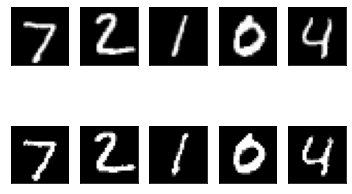

In [12]:
import numpy as np

def run_network(
    activation,
    params_file='AE_params',
    n_steps=30,
    scale=1,
    synapse=None,
    n_test=400,
):

    # convert keras model to nengo network
    nengo_converter = nengo_dl.Converter(
        autoencoder,
        swap_activations={tf.nn.relu: activation},
        scale_firing_rates=scale,
        synapse=synapse,
    )

    net = nengo_converter.net

    # get i/o objects
    nengo_input = nengo_converter.inputs[input_img]
    nengo_output = nengo_converter.outputs[decoded]

    # repeat inputs for num timesteps
    tiled_test_images = np.tile(test_images[:n_test], (1, n_steps, 1))

    # options to speed sim
    with nengo_converter.net:
        nengo_dl.configure_settings(stateful=False)
        
    # build network, load weights, run inference on test images
    with nengo_dl.Simulator(net, minibatch_size=50, seed=0) as nengo_sim:
        nengo_sim.load_params(params_file)
        data = nengo_sim.predict({nengo_input: tiled_test_images})

        # plot images comparison
        imgs = data[nengo_output]
        n = 5
        for i in range(n):
            ax = plt.subplot(2, n, i+1)
            plt.imshow(np.reshape(test_images[i], (28, 28)))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            ax = plt.subplot(2, n, n+i+1)
            plt.imshow(imgs[i, n_steps-1].reshape((28, 28)))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

run_network(activation=nengo.SpikingRectifiedLinear(), synapse=0.001, scale=2000)